# Exploring Used Car Listings on eBay

This project explores used car listings from the [German eBay](https://www.ebay.de) website with a special focus on data cleaning. The original dataset, which is available on [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data) has been modified by [Dataquest](https://www.dataquest.io) reducing the number of entries from 370,000 to 50,000.

Let's start by reading the file and examining the file content.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

autos = pd.read_csv('autos.csv', encoding='Latin-1')
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [2]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
autos.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07
49999,2016-03-14 00:42:12,Opel_Vectra_1.6_16V,privat,Angebot,"$1,250",control,limousine,1996,manuell,101,vectra,"150,000km",1,benzin,opel,nein,2016-03-13 00:00:00,0,45897,2016-04-06 21:18:48


We observe that the dataset comprises 50,000 rows and 20 columns. Five of the columns contain null values with two of them having around 10% of their values as null and one of them around 20%. We also see that 15 out of 20 columns are stored as string, while the other 5 are stored as integer.

The column names in the dataset are entered in camel case, which we will change to snake case following Python convention. In addition, we will modify some of the column names to improve clarity. 

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
autos.rename({'dateCrawled': 'date_crawled', 'offerType': 'offer_type', 'abtest': 'ab_test', 'vehicleType': 'vehicle_type', 'yearOfRegistration': 'registration_year', 'powerPS': 'power_ps', 'monthOfRegistration': 'registration_month', 'fuelType': 'fuel_type', 'notRepairedDamage': 'unrepaired_damage', 'dateCreated': 'ad_created', 'nrOfPictures': 'num_photos', 'postalCode': 'postal_code', 'lastSeen': 'last_seen'}, axis=1, inplace=True)

autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen'],
      dtype='object')

## Preliminary Exploration and Data Cleaning

Let's begin with descriptive statistics on the dataset.

In [6]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 16:37:21,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


At first glance we notice that there are some columns that almost entirely consist of a single value, as is evident from the frequency row. Namely, the `seller` and `offer_type` columns contain a single value for all but one of the entries. Since these columns do not provide any meaninful insight given their lack of information, we can remove them from our dataset.

It also appears that the `num_photos` column comprises the value zero for all entries. Let's confirm this by counting all unique values in the column.

In [7]:
autos['num_photos'].value_counts()

0    50000
Name: num_photos, dtype: int64

It is clear that all rows for this column consists of zeros, so we can remove `num_photos` column as well as the `seller` and `offer_type` columns.

In [8]:
autos = autos.drop(['seller', 'offer_type', 'num_photos'], axis=1)

Upon further examination of the columns, we see that there are two columns (`price` and `odometer`) that are numeric in nature but are stored as strings, which would prevent us from performing numeric operations on them. Thus, we will first clean the columns to contain only numeric information and then convert them to integer data type.

In [9]:
autos['price'] = autos['price'].str.replace('$','').str.replace(',','').astype(int)
autos['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

In [10]:
autos['odometer'] = autos['odometer'].str.replace('km','').str.replace(',',"").astype(int)
autos['odometer'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int32

Finally, let's change the column name for `odometer` to store the unit information that we just removed from our entries.

In [11]:
autos.rename({'odometer': 'odometer_km'}, axis=1, inplace=True)
autos.columns[9]

'odometer_km'

## Further Exploration of Registration Year, Price and Odometer

Let's continue our exploration with measure of central tendencies for the columns. The minimum and maximum values for the `registration_year` column are clearly incorrect with values of 1000 and 9999. We can investigate each end of the spectrum for this column before deciding on how to deal with this issue.

In [12]:
autos.describe(include='all')[4:]

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
mean,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,50813.627300,NaN
std,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,25779.747957,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,30451.000000,NaN
50%,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,49577.000000,NaN
75%,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,71540.000000,NaN
max,NaN,NaN,1.000000e+08,NaN,NaN,9999.000000,NaN,17700.000000,NaN,150000.000000,12.000000,NaN,NaN,NaN,NaN,99998.000000,NaN


In [13]:
autos['registration_year'].sort_values().head(20)

22316    1000
49283    1001
24511    1111
35238    1500
10556    1800
32585    1800
28693    1910
42181    1910
15898    1910
3679     1910
30781    1910
33295    1910
45157    1910
22659    1910
46213    1910
21416    1927
22101    1929
11246    1931
2573     1934
2221     1934
Name: registration_year, dtype: int64

In [14]:
autos['registration_year'].sort_values().tail(20)

5763     2019
49185    2019
27578    2800
4549     4100
453      4500
42079    4800
22799    5000
4164     5000
49153    5000
24519    5000
27618    5911
8360     6200
25003    8888
49910    9000
13559    9000
6308     9996
8012     9999
14341    9999
33950    9999
38076    9999
Name: registration_year, dtype: int64

We see that there are other values that are incorrect on both ends and need to be cleaned. One approach we could adopt is to simply remove all of rows with such values. Given that there are 50,000 data points in our dataset, removing a couple dozen entries would not likely skew the data, but perhaps we can consider replacing the average of all values with these outliers, which would enable us to keep the entries.

In order to achieve this goal, first we should determine the mean value excluding the outliers.

In [15]:
reg_year_list = []
for reg_year in autos['registration_year']:
    if reg_year > 1900 and reg_year < 2020:
        reg_year_list.append(reg_year)

reg_year_series = pd.Series(reg_year_list)
reg_year_avg = round(reg_year_series.mean())
reg_year_avg

2003

Now we can replace the outliers with the mean value.

In [44]:
for index, reg_year in autos['registration_year'].iteritems():
    if reg_year < 1900 or reg_year > 2019:
        autos['registration_year'][index] = reg_year_avg
        
autos['registration_year'].describe()

count    48565.000000
mean      2003.461320
std          7.564644
min       1910.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2019.000000
Name: registration_year, dtype: float64

Now let's move on to a closer look at the `price` column.

In [17]:
print(round(autos["price"].describe()).astype(int))
print(autos["price"].unique().shape)

count       50000
mean         9840
std        481104
min             0
25%          1100
50%          2950
75%          7200
max      99999999
Name: price, dtype: int32
(2357,)


The column contains 2,357 unique values, which is not unreasonable for 50,000 entries as sellers tend to pick either rounded values (ie. €12,000 as opposed to €12,351) or follow psychological pricing (€11,990, €11,999, etc.). However, when we look at the both ends of the spectrum, we see zero for the minimum value and almost 100 million for the maximum value. Let's investigate the top and bottom values to get a fuller picture.

In [18]:
autos['price'].value_counts().sort_index()

0           1421
1            156
2              3
3              1
5              2
            ... 
10000000       1
11111111       2
12345678       3
27322222       1
99999999       1
Name: price, Length: 2357, dtype: int64

On the lower end we have 1,421 entries with a price of zero. This is a rather high value for 50,000 entries, which accounts for close to 3% of entries. It would be interesting to see the most common (and least common prices) for all entries.

In [19]:
autos['price'].value_counts().sort_values()

33980       1
19599       1
7333        1
17899       1
66          1
         ... 
1000      639
2500      643
1500      734
500       781
0        1421
Name: price, Length: 2357, dtype: int64

Here we see that listings with cars for €0 constitutes the most common price. One strategy we could follow here is to simply replace the value of zero with the average price, but modifying 1,421 entries this way would skew our data towards the mean (affecting standard deviation), so it would be preferrable to remove the entries instead.

Next, we see 156 listings with a price of €1. Since eBay is an auction site it is not uncommon for bids to start at €1, so we will keep these entries as we wouldn't want to alter or remove data too haphazardly.

On the other end of the spectrum we have a listing for almost 100 million euros and at least seven other listings in ten figures. Let's take a look the listing count with highest prices.

In [20]:
autos['price'].value_counts().sort_index(ascending=False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

Given that the [most expensive car ever sold](https://www.forbes.com/sites/guymartin/2019/12/11/the-most-expensive-car-ever-sold-how-the-sale-of-a-44-million-ferrari-250gto-wound-up-in-a-london-court/#c5d4da42de80) had a price of around 44 million dollars, we could most certainly rule out the listing with 100 million euros price tag (112 million USD at the time of this writing). Furthermore, since it would be highly unusual for a car priced in the range of millions to be listed on eBay and since a [list of cars sold with a price over 4 million dollars](https://en.wikipedia.org/wiki/List_of_most_expensive_cars_sold_at_auction#Absolute_record) does not include any reference to eBay, let alone a specific one month period on the German eBay website, we can remove values over one million with confidence.

Looking at the list above for values below €1,000,000, we observe a large gap between €350,000 and €999,990. The values just below €350,000 are spread out relatively evenly without any large gaps, so it is a reasonable point to set as our maximum.

In [21]:
autos = autos[autos['price'].between(1, 350001)]
autos['price'].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

Finally, let's take a look at the `odometer` column to determine if there are any outliers.

In [22]:
print(autos['odometer_km'].value_counts())
autos['odometer_km'].unique().size

150000    31414
125000     5057
100000     2115
90000      1734
80000      1415
70000      1217
60000      1155
50000      1012
5000        836
40000       815
30000       780
20000       762
10000       253
Name: odometer_km, dtype: int64


13

This field contains only thirteen unique values all of which consist of rounded numbers. Given the low likelihood of this happening with 50,000 data points, it appears that the values are provided to sellers as pre-set options when they are filling out the form for their post. There is nothing that stands out, perhaps except that the values are quite heavily skewed towards the high mileage vehicles. Let's compare the count of top value for mileage (150,000) with the count of all of the other entries.

In [23]:
autos_150000km = autos.loc[autos['odometer_km'] == 150000, 'odometer_km'].value_counts().sum()
autos_other_mileage = autos.loc[autos['odometer_km'] != 150000, 'odometer_km'].value_counts().sum()
print('Odometer with 150,000km: ', autos_150000km)
print('Odometer with other values: ', autos_other_mileage)

Odometer with 150,000km:  31414
Odometer with other values:  17151


We see that there are more cars listed with a mileage of 150,000km than all other mileages combined. Still this is not particularly surprising as people tend to sell their cars after using them for a relatively extended period of time. Also, cars with lower mileage tend to be more expensive, so the top-range cars with low mileage are more likely to be sold through dealers than online posts which tend to be somewhat riskier.

## Examination of the Date Columns

Five of the twenty columns in our dataset contain date information. Two of these columns (`registration_year` and `registration_month`) have partial date information while the other three contain full date information (`date_crawled`, `ad_created`, `last_seen`).

We have already discussed the `registration_year` column. Now let's take a look at the other partial date column of `registration_month`.

In [24]:
autos['registration_month'].describe()

count    48565.000000
mean         5.782251
std          3.685595
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: registration_month, dtype: float64

The quartile information is suprisingly very uniform. One anomaly here is the minimum value of zero, which does not correspond to any month and presumably is a place holder for 'not available'. We could consider removing these from our dataset but since registration month is not a particularly useful metric, we could also opt to keep them as removing these entries would result in a loss of other potentially important information.

The mean indicates a slight tendency towards the first half of the year, probably due to inclusion of zero, and the standard deviation indicates that 68% of all the months in our dataset fall within 3.69 months above or below the mean of 5.78. Given the precision of quartiles it would be interesting to see the relative frequency for each month, excluding the value of zero.

In [25]:
autos.loc[autos['registration_month'] != 0, 'registration_month'].value_counts(normalize=True,dropna=False)

3     0.113485
6     0.096881
4     0.091550
5     0.091437
7     0.087490
10    0.081388
12    0.076534
9     0.075536
11    0.075150
1     0.073018
8     0.070908
2     0.066621
Name: registration_month, dtype: float64

We see that the most common month of car registration is March, while the least common month is February. Interestingly the top 5 months fall in spring and summer. 

Let's continue with the columns with full date information, which are stored as strings. The `date_crawled` column refers to the dates the website was crawled.

We see that the website was crawled for 34 days starting on March 5 and ending on April 7. Although the distribution is fairly even throughout, there is a substantial drop in the last three days (April 5-7). Especially the last two days indicate that the number of listings crawled fell by 90% or more.

We can also look at the scatter plot for this set.

In [26]:
dates_crawled = autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()
dates_crawled_df = pd.DataFrame(dates_crawled.items(), columns=['Date','Percentage'])
dates_crawled_df

,Date,Percentage
0,2016-03-05,0.025327
1,2016-03-06,0.014043
2,2016-03-07,0.036014
3,2016-03-08,0.033296
4,2016-03-09,0.033090
5,2016-03-10,0.032184
6,2016-03-11,0.032575
7,2016-03-12,0.036920
8,2016-03-13,0.015670
9,2016-03-14,0.036549


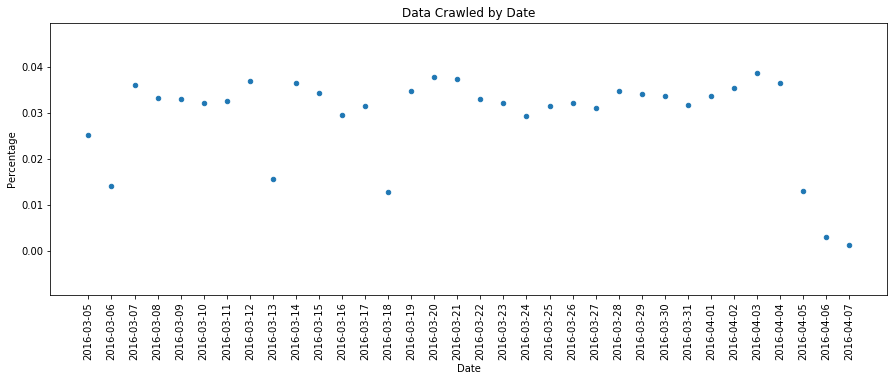

In [27]:
dates_crawled_df.plot(x='Date', y='Percentage', kind='scatter', title='Data Crawled by Date', figsize=(15,5))
plt.xticks(rotation=90)
plt.show()

Looking at this plot our earlier observation of the 'last three day drop' certainly holds true, but we also see three additional drops on earlier dates which are easier to spot with the help of visuals. One possible reason for this might have to do with the days of the week. Let's see if these earlier drops fall on certain days.

In [28]:
dates_crawled_df_low = dates_crawled_df[(dates_crawled_df['Percentage'] < 0.02) 
                                                    & (dates_crawled_df['Date'] < '2016-04-04')]

for date in dates_crawled_df_low['Date']:
    day = dt.datetime.strptime(date, '%Y-%m-%d').strftime('%A')
    print(day)

Sunday
Sunday
Friday


Here we see that two of the three days fall on a weekend, which might explain the reason for the drop in crawls. Now let's take a look at the `ad_created` column.

In [29]:
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

The posting date for ads span over a 10-month period. Not suprisingly, the gap between older dates are larger than the ones for more recent dates since the ads created earlier are more likely to be removed due to cars being sold or ad having expired. 

Interestingly, once again we observe that there is a drop in the last three days, and particularly the last two days. Perhaps this could be explained by some sort of delay between the dates of post submission and its appearance on the website. For example, if there is a process that requires posts to be approved, which might take some time (a number of hours to a number of days), then the date of crawling would not necessarily show all the new ads, which are to appear in a day or two.

The third full date column, `last_seen` refers to date a post last appeared on the website implying the date of removal of the post for one reason or another.

In [30]:
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

The values here are less uniform than other date columns. We can gain a better understanding of this by sorting the dates by relative frequencies.

In [31]:
autos['last_seen'].str[0:10].value_counts(normalize=True, dropna=False).sort_values()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-18    0.007351
2016-03-08    0.007413
2016-03-13    0.008895
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-14    0.012602
2016-03-27    0.015649
2016-03-19    0.015834
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-26    0.016802
2016-03-23    0.018532
2016-03-25    0.019211
2016-03-24    0.019767
2016-03-21    0.020632
2016-03-20    0.020653
2016-03-28    0.020859
2016-03-22    0.021373
2016-03-29    0.022341
2016-04-01    0.022794
2016-03-12    0.023783
2016-03-31    0.023783
2016-04-04    0.024483
2016-03-30    0.024771
2016-04-02    0.024915
2016-04-03    0.025203
2016-03-17    0.028086
2016-04-05    0.124761
2016-04-07    0.131947
2016-04-06    0.221806
Name: last_seen, dtype: float64

Excluding the last three days, the values range from 0.1% to roughly 3% of all entries. However, there is a remarkable spike in the last three days. It would be helpful to view the data on a line plot. However, since the rest of the graph pales in comparison to last three days we will present two versions using two plots: one with full data and another with last three days excluded.

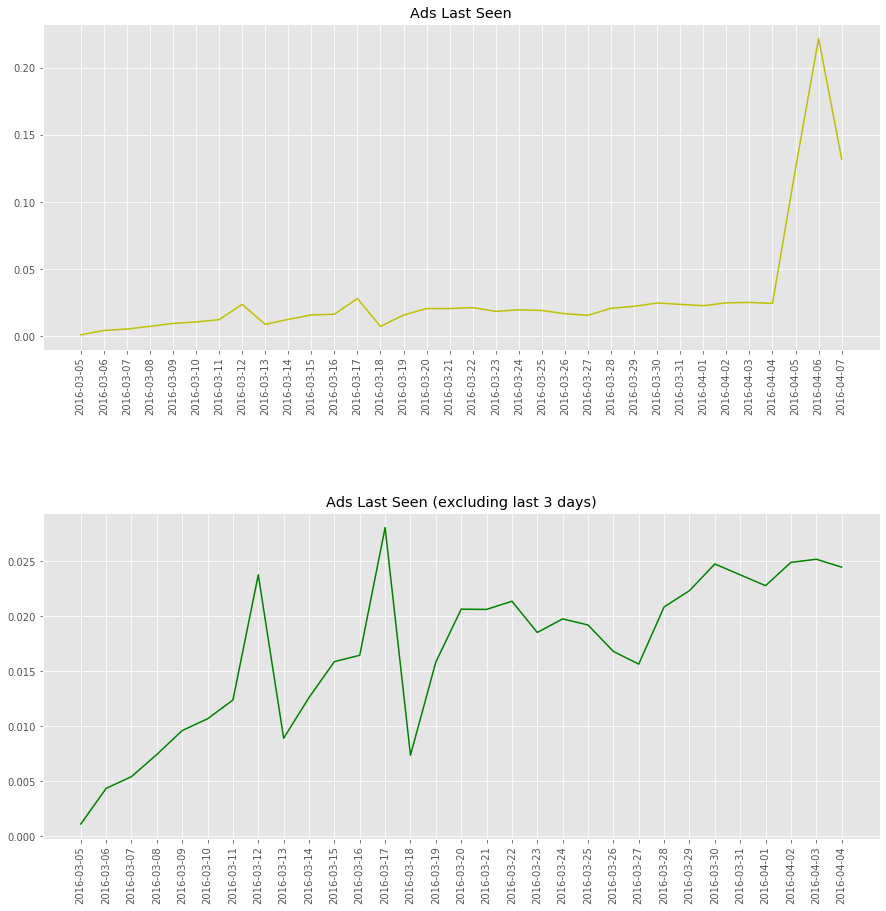

In [32]:
last_seen_df = pd.DataFrame(autos['last_seen'].str[0:10].value_counts(normalize=True, dropna=False).sort_index().items(), columns=['Date', 'Percentage'])
last_seen_df_exc = last_seen_df[:-3]

plt.style.use('ggplot')

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1_xlabels = last_seen_df['Date']
ax1.plot(last_seen_df['Date'], last_seen_df['Percentage'], 'y-')
ax1.set_xticklabels(ax1_xlabels, rotation = 90)
ax1.set_title('Ads Last Seen')

ax2_xlabels = last_seen_df_exc['Date']
ax2.plot(last_seen_df_exc['Date'], last_seen_df_exc['Percentage'],'g-')
ax2.set_xticklabels(ax2_xlabels, rotation = 90)
ax2.set_title('Ads Last Seen (excluding last 3 days)')

plt.subplots_adjust(hspace=0.5)

plt.show()

Here we see that the general trend is that the earlier the date the lower the number of ads removed. There are two spikes in the second plot: March 12 and March 17. This is followed by a dip on March 18. If we exclude these two spikes, the line forms a reasonably smooth upward trend. Focusing back on the first plot, once again we see that the last three days form an anomaly where the numbers spike from around 2% to first 12-13% ,and then to 22% for the last day. It seems highly unlikely that car sales somehow shot up by 600%-1000% in those three days, which is further supported by what we have already seen as unusual patterns for the last three days. We don't have any information on how the crawling was conducted, but it appears that the "last 3-day anomalies" present in all three columns might have to do with the methdology adopted for the crawling process.

## Investigating Price, Engine Power, Mileage and Vehicle Type by Brand

Our analysis will conclude with a deeper look into various properties by brand. Let's start with a count and relative frequency distributions of all brands.

In [33]:
print('Count:', autos['brand'].value_counts(normalize=True, dropna=False).count())
autos['brand'].value_counts(normalize=True, dropna=False)

Count: 40


volkswagen        0.212828
opel              0.108658
bmw               0.108597
mercedes_benz     0.095789
audi              0.085823
ford              0.069639
renault           0.047874
peugeot           0.029445
fiat              0.025986
seat              0.018944
skoda             0.016061
nissan            0.015258
mazda             0.015217
smart             0.014290
citroen           0.014125
toyota            0.012581
hyundai           0.009945
sonstige_autos    0.009698
volvo             0.009039
mini              0.008607
mitsubishi        0.008216
honda             0.007989
kia               0.007104
alfa_romeo        0.006610
porsche           0.005910
suzuki            0.005889
chevrolet         0.005663
chrysler          0.003480
dacia             0.002656
daihatsu          0.002512
jeep              0.002224
subaru            0.002121
land_rover        0.002039
saab              0.001627
daewoo            0.001565
jaguar            0.001524
trabant           0.001400
r

The dataset contains 40 brands, but the top 4 brands, Volkswagen, Opel, BMW and Mercedes-Benz, account for more than half of all listings. Given Germany's strength in automotive industry, as well as the fact that the data is crawled from the German eBay website, it is hardly surprising that the top 5 brands are all German. These brands make up around 60% of the entire dataset.

On the other end of the spectrum, more than half of the brands hold less than 1% of the listings individually. Here we will focus on the brands that hold at least 5% of all entries.

In [34]:
auto_brand_count = autos['brand'].value_counts(normalize=True, dropna=False)
major_brands_count = auto_brand_count[auto_brand_count > 0.05]
major_brands = major_brands_count.index
print(major_brands_count)

volkswagen       0.212828
opel             0.108658
bmw              0.108597
mercedes_benz    0.095789
audi             0.085823
ford             0.069639
Name: brand, dtype: float64


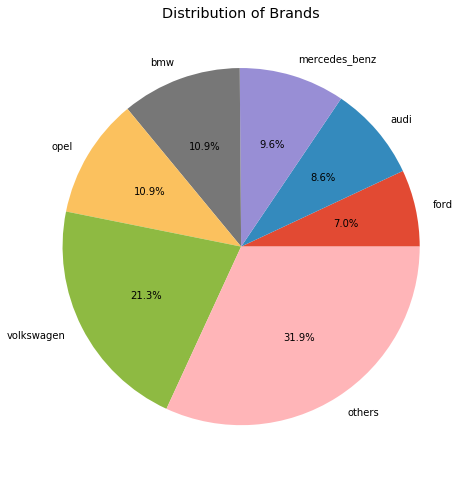

In [35]:
brands = autos['brand'].value_counts(normalize=True, dropna=False)
brands = pd.Series(brands).sort_values()
brands_major = brands[brands > 0.05]
brands_rest = pd.Series(data = {'others' : brands[brands <= 0.05].sum()})
brands_all = pd.concat([brands_major, brands_rest])
brands_all.plot.pie(figsize=(8,12), title='Distribution of Brands', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

Now let's take a look at the average price, as well as maximum and minimum prices for each brand.

In [36]:
brand_avg ={}
brand_max={}
brand_min={}

for brand in major_brands:
    auto_brand = autos[autos['brand'] == brand]
    
    avg = round(auto_brand['price'].mean())
    maximum = round(auto_brand['price'].max())
    minimum = round(auto_brand['price'].min())
    
    brand_avg[brand] = avg
    brand_max[brand] = maximum
    brand_min[brand] = minimum

print(brand_avg)
print(brand_max)
print(brand_min)

{'volkswagen': 5332, 'opel': 2945, 'bmw': 8261, 'mercedes_benz': 8536, 'audi': 9213, 'ford': 3728}
{'volkswagen': 64500, 'opel': 38990, 'bmw': 259000, 'mercedes_benz': 180000, 'audi': 175000, 'ford': 130000}
{'volkswagen': 1, 'opel': 1, 'bmw': 1, 'mercedes_benz': 1, 'audi': 1, 'ford': 1}


The representation of dictionaries above is visually not as clear as it can be. We can present these in a more intuitive table format, as well as on a bar plot. Note that minimum value for all brands are 1, so we will leave them out.

In [37]:
price_avg = pd.Series(brand_avg, name='mean_price')
price_max = pd.Series(brand_max, name='max_price')

pd.concat([price_avg, price_max], axis=1)

,mean_price,max_price
volkswagen,5332,64500
opel,2945,38990
bmw,8261,259000
mercedes_benz,8536,180000
audi,9213,175000
ford,3728,130000


Text(0.5, 1.0, 'Brands by Maximum Price')

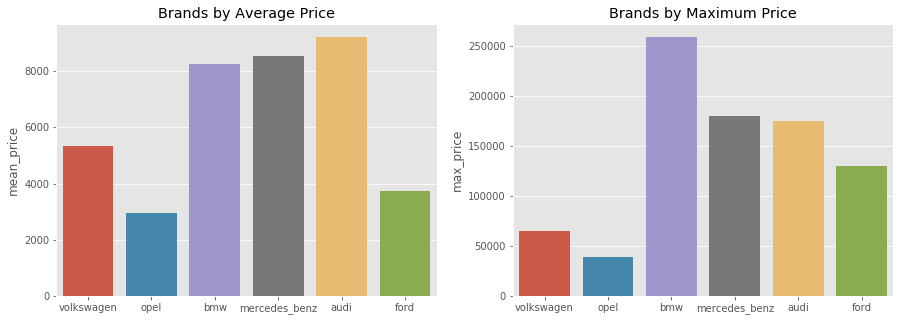

<Figure size 432x360 with 0 Axes>

In [38]:
import seaborn as sns

price_avg_max = pd.concat([price_avg, price_max], axis=1)

#f, (ax1, ax2) = plt.subplots(2)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plt.figure(figsize=(6,5))
sns.barplot(x = price_avg_max.index, y='mean_price', ax=ax1, data=price_avg_max)
sns.barplot(x = price_avg_max.index, y='max_price', ax=ax2, data=price_avg_max)
ax1.set_title('Brands by Average Price')
ax2.set_title('Brands by Maximum Price')

The tables and figures above indicate that Audi is the most expensive of all brands, followed by Mercedes-Benz and BMW. After these three brands there is a large gap in mean price. Focusing on the top 3 brands, it's surprising to see that maximum price is inversely related to mean price. Among the 3 brands, Audi, which holds the top spot for mean price with €9,213, has a maximum price of €175,000, which is lower than the other two brands. On the contrary, BMW that is placed third in terms of mean price with a value of €8,261 has the highest maximum price of all. We can observe these in a bar chart combining maximua and mean prices. Note that given the price differences between mean values and maxima, we will use a logarithmic scale without which the mean values would be difficult to discern visually.

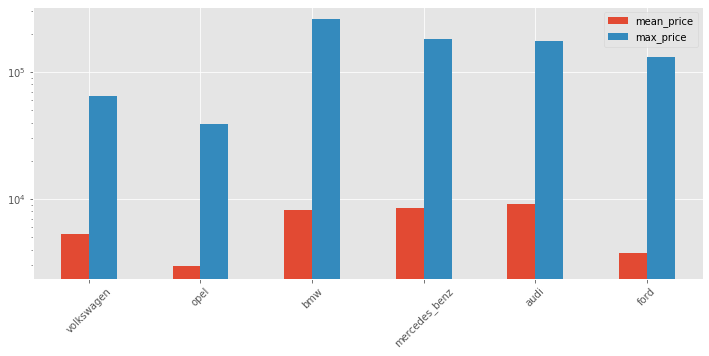

In [39]:
price_avg_max.plot.bar(figsize=(12,5))
plt.xticks(rotation=45)
plt.yscale('log')

Now let's take a look at the engine power, mileage and vehicle type for these brands.

In [40]:
engine_power = {}
mileage = {}
vehicle_type = {}

for brand in major_brands:
    auto_brand = autos[autos['brand'] == brand]
    
    power = round(auto_brand['power_ps'].mean())
    odometer = round(auto_brand['odometer_km'].mean())
    car_type = auto_brand['vehicle_type'].value_counts(normalize=True)
    
    engine_power[brand] = power
    mileage[brand] = odometer
    vehicle_type[brand] = car_type

power_avg = pd.Series(engine_power, name='mean_power')
mileage_avg = pd.Series(mileage, name='mean_mileage')

pd.concat([power_avg, mileage_avg], axis=1)

,mean_power,mean_mileage
volkswagen,99,128897
opel,95,129383
bmw,167,132683
mercedes_benz,150,130796
audi,160,129493
ford,101,124349


Looking at the engine power, once again we see a cluster of three brands (BMW, Audi, Mercedes-Benz) at the top and another cluster for the other three brands (Ford, Volkswagen, Opel). BMW comes on top with an average horsepower of 167, followed by Audi with 160 horsepower and Mercedes-Benz with 150 horsepower.

The mean mileage of brands are reasonably close to one another, perhaps with the exception of Ford which has the least mileage of all and a gap of over four thousand to the closest brand, Volkswagen. Interestingly the top three brands in mean power are also the top three brands in mean mileage. There seems to be a correlation between the engine power and the cars longevity assuming a higher mean mileage implies higher longevity.

Finally, let's see the relative frequency of vehicle types for each brand.

In [41]:
pd.DataFrame(vehicle_type).transpose()

,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
volkswagen,0.009375,0.150442,0.045569,0.026382,0.265126,0.189251,0.288346,0.025510
opel,0.006442,0.118746,0.044234,0.039510,0.345287,0.207000,0.225896,0.012884
bmw,0.005466,0.001215,0.103644,0.114575,0.012753,0.229555,0.504453,0.028340
mercedes_benz,0.009009,0.087318,0.090090,0.101871,0.031647,0.197967,0.430353,0.051744
audi,0.004887,0.000772,0.070730,0.066101,0.051698,0.399949,0.388889,0.016975
ford,0.009901,0.119142,0.029703,0.034323,0.338614,0.261386,0.176238,0.030693


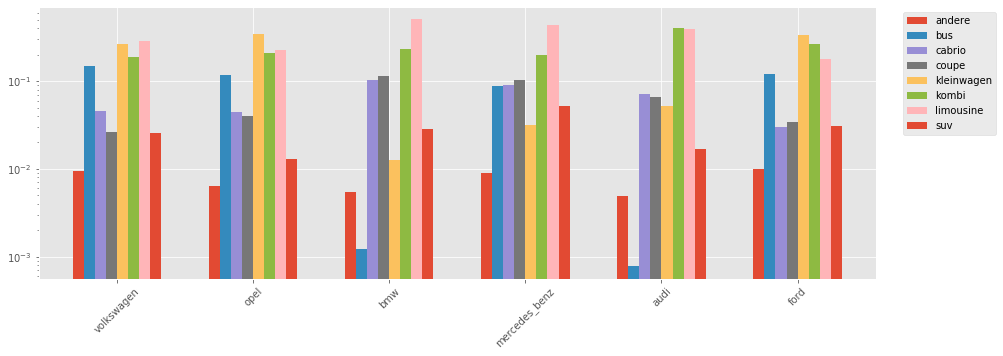

In [42]:
veh_type = pd.DataFrame(vehicle_type).transpose()

veh_type.plot.bar(figsize=(15,5), width=0.65)
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

The dataset contains eight vehicle types: andere (other), bus, cabrio, coupe, kleingwagen (supermini), kombi (station wagon), limousine and SUV.

Focusing on the representation of each type in brands, we see that Volkswagen has the highest percentage of buses (15%) and lowest percentage of coupes (2.6%) and station wagons (18.9%). Opel has the highest supermini percentage (34.5%) and the lowest SUV percentage (1.2%). BMW leads the cabrio, coupe and limousine categories (10.3%, 11.5% and 50%, respectively) while holding the lowest percentage for the supermini category (1.3%). Mercedes-Benz holds the highest percentage of SUVs (5.2%) and the second-highest percentages of cabrios and coupes right behind BMW. In terms of percentages Audi has almost twice the amount of station wagen with 40% of its entire listing (followed by BMW with 23%). It also has the lowest percentage of buses (0.08%), which is also the lowest percentage of any vehicle type by any brand. Finally, Ford holds the second-highest percentage for super-mini (33.7%) and the lowest percentages for cabrio (3%) and limousine (17.6%).

It is interesting to note that 50% of all BMW listings are limousines, which seems rather high. This would likely skew the mean price upward. Although not nearly as high, 15% of all Volkswagen listings are buses, which would also affect the price to some extent. It is also worth noting that 79% of Audi listings are either station wagon or limousine. It appears that Volkswagen, Opel and Ford have rather uniform distributions. A more accurate way to understand how smoothly the vehice types are distributed among brands is to check the standard deviation for vehicle types.

In [43]:
std_dev_vehicle_types = {}

for brand in major_brands:
    auto_brand = autos[autos['brand'] == brand]
    std = round(auto_brand['vehicle_type'].value_counts(normalize=True).std(),4)
    std_dev_vehicle_types[brand] = std

std_dev_vehicle_types

{'volkswagen': 0.1136,
 'opel': 0.123,
 'bmw': 0.172,
 'mercedes_benz': 0.1359,
 'audi': 0.1684,
 'ford': 0.1233}

This confirms our observation that BMW and Audi have the highest standard deviation with their heavy holdings of limousines and limousine/station wagon, respectively. On the other hand, Volkswagen has the smoothest distribution with a rather low standard deviation, followed by Opel and Ford.

# Conclusion

In this project, we cleaned the dataset crawled from the German eBay website for used car listings and made a number of observations based on the resultant dataset.

During the cleaning process we removed specific columns that don't provide any meaningful information for our analysis, renamed columns to enhance clarity and consistency, and converted data types from strings to integers to be able to perform numeric operations on certain columns. 

We also identified outliers and entries with incorrect information and made decisions on how to proceed with these issues. In some cases we opted to replace incorrect values with the mean of the column (`registration_year`), in others we decided to retain the values, which did not have an effect on our analysis (`registration_month`), and yet in others we elected to remove the rows containing outliers altogether (`price`).

In our examination of columns regarding ad creation dates, ad removal dates and dates for the web crawling period, we observed an unusual pattern of spiking or plummeting values, which we called the "last 3-day anomalies." We hypothesized two possibilities, one that has to do with approval periods of new posts and another surmising a change in crawling behaviour or methodology during the last three days of crawling.

Finally, we investigated a number of variables based on car brands, which provided us with some interesting insights. For example, we discovered parallels between average price and engine power separating top-tier and lower-tier brands, yet an inverse relation between average price and maximum price within the top-tier (top 3) brands. We further observed a positive correlation between engine power and mileage implying a relationship between horsepower and longevity. In addition, we explored the distribution of vehicle types among brands, which we suspected as skewing prices higher for a certain brand (BMW), as well as overweighting of some brands in specific vehicle types (limousines and station wagons for BMW and Audi) while others having a relatively smooths distribution among vehicle types (Volkswagen, Opel and Ford). The information presented in this section could provide insights to potential buyers in making decisions among the top six brands in their share of ad space, in particular if some of the criteria they consider involve a combination of brand, price, mileage, engine power and vehicle type.